In [1]:
from models.model3 import linear_multiplicative_cooling, linear_additive_cooling, logarithmic_multiplicative_cooling
from models.model3 import BaseModel
from src.variables import sector, K, demands, coords, T, EM,a , b, service_time, N, Q_MAX
from src.graph import draw_graph
import time
import numpy as np

In [2]:
sector

,Punto de colecta,Latitud,Longitud,X_Longitude,Y_Latitude,UTM_X,UTM_Y,X,Y,demanda,service_time,a,b
0,d1,"8°07'34""S","79°01'47""W",8.126111,79.029722,717097.121783,9.101233e+06,717.097122,9101.232538,0,0.5,4,20
1,pc1,"8°07'52""S","79°02'00""W",8.131111,79.033333,716696.391133,9.100681e+06,716.696391,9100.681396,1,0.5,7,12
2,pc2,"8°07'48""S","79°01'59""W",8.130000,79.033056,716727.606565,9.100804e+06,716.727607,9100.804153,2,0.5,8,12
3,pc3,"8°07'45""S","79°01'58""W",8.129167,79.032778,716758.672853,9.100896e+06,716.758673,9100.896184,1,0.5,10,12
4,pc4,"8°07'42""S","79°02'04""W",8.128333,79.034444,716575.408573,9.100989e+06,716.575409,9100.989255,2,0.5,12,14
5,pc5,"8°07'47""S","79°02'06""W",8.129722,79.035000,716513.425949,9.100836e+06,716.513426,9100.835920,1,0.5,15,24
6,pc6,"8°07'51""S","79°01'53""W",8.130833,79.031389,716910.869825,9.100711e+06,716.910870,9100.711081,1,0.5,6,12
7,pc7,"8°07'50""S","79°01'47""W",8.130556,79.029722,717094.730484,9.100741e+06,717.094730,9100.740914,2,0.5,6,10
8,pc8,"8°07'46""S","79°01'49""W",8.129444,79.030278,717034.091147,9.100864e+06,717.034091,9100.864118,1,0.5,7,11
9,pc9,"8°07'52""S","79°01'45""W",8.131111,79.029167,717155.668531,9.100679e+06,717.155669,9100.679163,1,0.5,8,9


In [3]:
K

array([0, 1, 2, 3])

In [4]:
model = BaseModel()

created


In [5]:
start_time = time.time()
x0 = model.nearestNeighborHeuristic(16)
elapsed_time = time.time() - start_time
print("Tiempo de ejecución:", elapsed_time, "segundos")

Tiempo de ejecución: 0.003285646438598633 segundos


In [6]:
model.objective_function(x0)

0.4928178361655407

In [7]:
initial_route, df_summary = model.decoding(x0, summary=True)
df_summary

,Vehiculo,Nodoi-1,Nodoi,Distancia,TiempoArco,TW_A,TW_B,Tanque,CO2
0,0,0,16,0.674326,0.016858,5,9,0.981258,0.018742
1,0,16,7,0.852422,0.021311,6,10,0.957565,0.023692
2,0,7,6,0.186265,0.004657,6,12,0.952388,0.005177
3,0,6,8,0.196479,0.004912,7,11,0.946927,0.005461
4,0,8,9,0.221335,0.005533,8,9,0.940776,0.006152
5,0,9,2,0.445937,0.011148,8,12,0.928381,0.012394
6,0,2,1,0.126664,0.003167,7,12,0.924861,0.003521
7,0,1,3,0.223635,0.005591,10,12,0.918645,0.006216
8,0,3,10,0.442072,0.011052,11,13,0.906358,0.012287
9,0,10,15,0.804903,0.020123,10,14,0.883986,0.022372


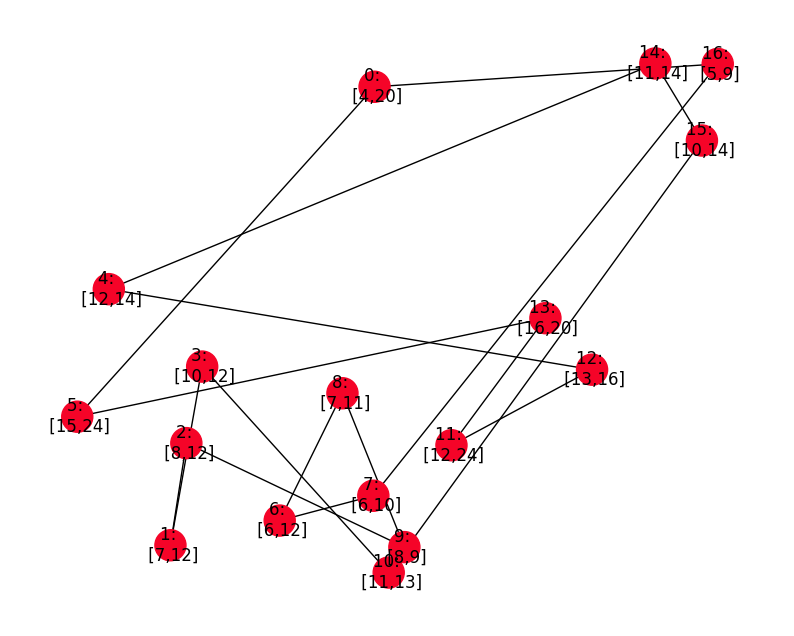

In [8]:
draw_graph(initial_route)

In [9]:
model.objective_function(x0)

0.4928178361655407

In [18]:
start_time = time.time()
info = model.ga(
    x0= x0,
    PopSize= 100,
    ElitePopSize= 10,
    subPopSize=20,
    MaxGenerations= 60,
    localOptimumTime= 10
)
elapsed_time = time.time() - start_time
print("Tiempo de ejecución:", elapsed_time, "segundos")

generation: 1
generation: 2
generation: 3
generation: 4
generation: 5
generation: 6
generation: 7
generation: 8
generation: 9
generation: 10
generation: 11
generation: 12
generation: 13
generation: 14
generation: 15
generation: 16
generation: 17
generation: 18
generation: 19
Tiempo de ejecución: 11.693032026290894 segundos


In [19]:
print(info['x_best'])
print(info['e_best'])

[16  8  7  9  6  2  1 10 14 15 12 13 11  3  4  5]
0.3692712567846358


In [20]:
optimal_route, df_summary2 = model.decoding(info['x_best'], summary=True)
df_summary2

,Vehiculo,Nodoi-1,Nodoi,Distancia,TiempoArco,TW_A,TW_B,Tanque,CO2
0,0,0,16,0.674326,0.016858,5,9,0.981258,0.018742
1,0,16,8,0.836409,0.020910,7,11,0.958010,0.023247
2,0,8,7,0.137318,0.003433,6,10,0.954194,0.003817
3,0,7,9,0.086756,0.002169,8,9,0.951782,0.002411
4,0,9,6,0.246871,0.006172,6,12,0.944921,0.006862
5,0,6,2,0.205543,0.005139,8,12,0.939208,0.005713
6,0,2,1,0.126664,0.003167,7,12,0.935688,0.003521
7,0,1,10,0.429764,0.010744,11,13,0.923743,0.011945
8,0,10,14,0.805359,0.020134,11,14,0.901358,0.022384
9,0,14,15,0.130135,0.003253,10,14,0.897741,0.003617


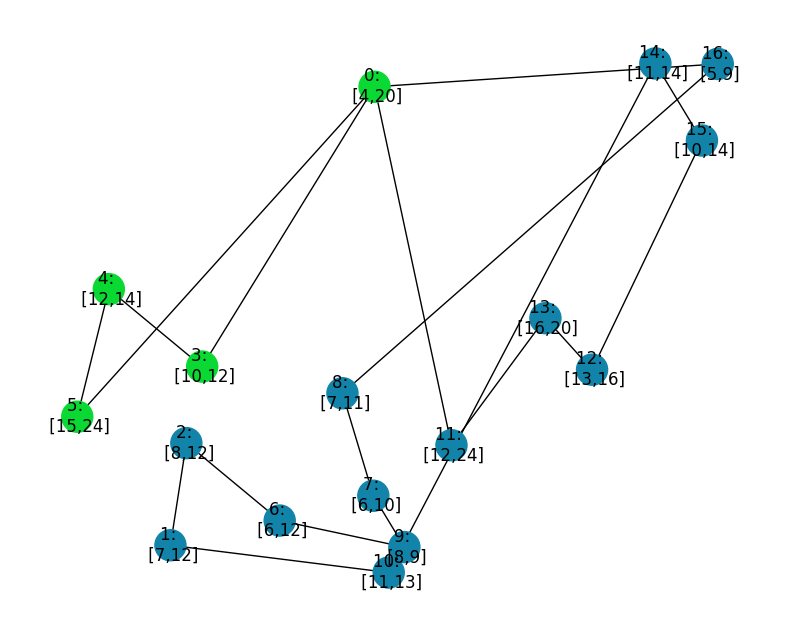

In [23]:
draw_graph(optimal_route)

In [17]:
model.draw_energy_plot(info['hist'])

## VEGSA

In [27]:

start_time = time.time()
Tmax = 300 
Tmin = 20
StepMax = 300
information = model.vegsa(
    x0= x0,
    PopSize= 100,
    ElitePopSize= 10,
    subPopSize=20,
    MaxGenerations= 100,
    localOptimumTime= 10,
    StepMax= StepMax,
    Tmin= Tmin,
    Tmax= Tmax,
    SAlocalEntropyTime= 10,
    cooling_operator= linear_additive_cooling(t_max=Tmax, t_min=Tmin, alpha=0.9, step_max=StepMax)
)
elapsed_time = time.time() - start_time
print("Tiempo de ejecución:", elapsed_time, "segundos")

GA init: 
generation: 1
generation: 2
generation: 3
generation: 4
generation: 5
generation: 6
generation: 7
generation: 8
generation: 9
generation: 10
generation: 11
generation: 12
generation: 13
generation: 14
generation: 15
generation: 16
GA result: 
{'x_best': array([16, 15, 14,  8,  9,  6,  1,  2,  3,  4,  7, 10, 11, 12, 13,  5]), 'e_best': 0.36617669723088464, 'time': 16, 'hist': [(1, 0.4682185951180602), (2, 0.44221964356555543), (3, 0.4344783986773819), (4, 0.41134211071364385), (5, 0.4075596255452095), (6, 0.3737516281058261), (7, 0.36617669723088464), (8, 0.36617669723088464), (9, 0.36617669723088464), (10, 0.36617669723088464), (11, 0.36617669723088464), (12, 0.36617669723088464), (13, 0.36617669723088464), (14, 0.36617669723088464), (15, 0.36617669723088464), (16, 0.36617669723088464)]}
SA init: 
step: 1, temperature: 300, energy: 0.36617669723088464
step: 2, temperature: 299.06666666666666, energy: 0.36617669723088464
step: 3, temperature: 298.1333333333333, energy: 0.36617

In [28]:
print(information['x_best'])
print(information['e_best'])
print(information['temperature'])
print(information['time'])

[16 15 14  8  7  9  6  2  1 10 11 12 13  3  4  5]
0.3263892459615466
20.0
301


In [29]:
optimal_route3, df_summary3 = model.decoding(information['x_best'], summary=True)
df_summary3

,Vehiculo,Nodoi-1,Nodoi,Distancia,TiempoArco,TW_A,TW_B,Tanque,CO2
0,0,0,16,0.674326,0.016858,5,9,0.981258,0.018742
1,0,16,15,0.097133,0.002428,10,14,0.978558,0.002700
2,0,15,14,0.130135,0.003253,11,14,0.974941,0.003617
3,0,14,0,0.552004,0.013800,4,20,0.959599,0.015342
4,1,0,8,0.373773,0.009344,7,11,0.989611,0.010389
5,1,8,7,0.137318,0.003433,6,10,0.985795,0.003817
6,1,7,9,0.086756,0.002169,8,9,0.983383,0.002411
7,1,9,6,0.246871,0.006172,6,12,0.976522,0.006862
8,1,6,2,0.205543,0.005139,8,12,0.970809,0.005713
9,1,2,1,0.126664,0.003167,7,12,0.967288,0.003521


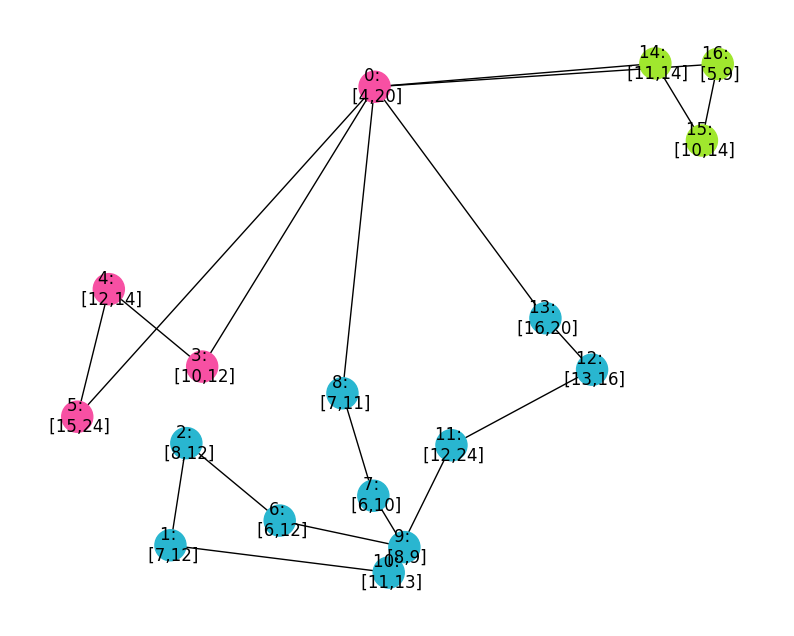

In [49]:
draw_graph(optimal_route3)